In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, roc_curve,auc,f1_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')


In [41]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [42]:
df.shape

(768, 8)

In [43]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [44]:
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<AxesSubplot:ylabel='Outcome'>

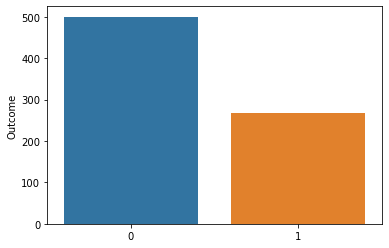

In [45]:
sns.barplot(x=df.Outcome.value_counts().index ,y = df.Outcome.value_counts())

In [46]:
# Checking missing value
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
# Check for Duplicate records
df[df.duplicated()]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [48]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Glucose'>

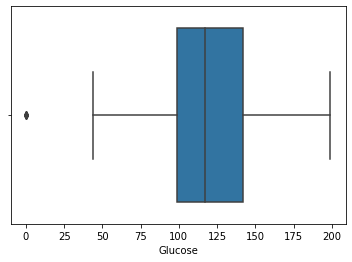

In [49]:
sns.boxplot(x= df.Glucose)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

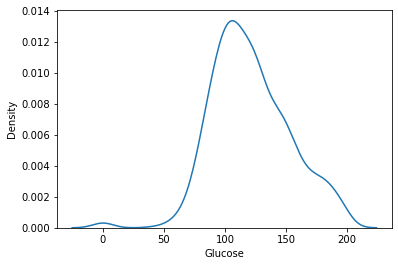

In [50]:
sns.kdeplot(x= df.Glucose)

In [51]:
df.Glucose.replace(0,117, inplace=True)

<AxesSubplot:xlabel='Glucose'>

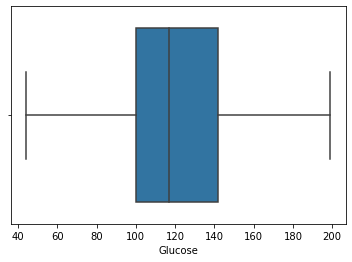

In [52]:
sns.boxplot(x= df.Glucose)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

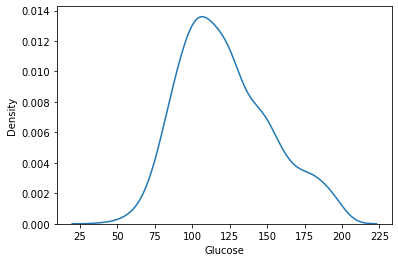

In [53]:
sns.kdeplot(x= df.Glucose)

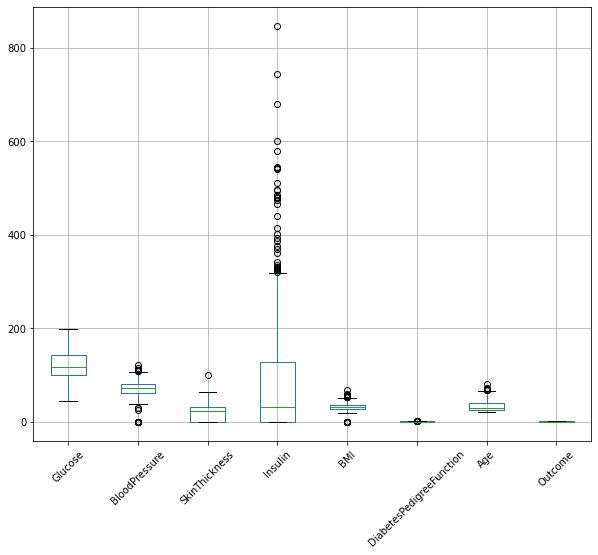

In [54]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.xticks(rotation='45')
plt.show()

In [55]:
X = df.drop('Outcome',axis =1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33


In [56]:
y= df['Outcome']
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [57]:
# as this logistic regression is distance based, scaling is required
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.863880,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.219664,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,2.021404,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.930024,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.930024,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722


In [58]:
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [59]:
X_test.shape

(154, 7)

In [60]:
X_train.shape

(614, 7)

In [61]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# training accuracy--> way1
model.score(X_train,y_train)

0.7785016286644951

In [63]:
# training accuracy
model.score(X_test,y_test)

0.7857142857142857

In [64]:
pred_train = model.predict(X_train)
pred_train[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [65]:
y_train[0:5]

602    0
429    1
623    0
209    1
589    0
Name: Outcome, dtype: int64

In [66]:
accuracy_score(y_train,pred_train)

0.7785016286644951

In [67]:
pred_test = model.predict(X_test)
acc_test = accuracy_score(y_test,pred_test)
print('acc_test:-',acc_test)

acc_test:- 0.7857142857142857


In [68]:
confusion_matrix(y_test,pred_test)

array([[95, 14],
       [19, 26]], dtype=int64)

In [69]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.65      0.58      0.61        45

    accuracy                           0.79       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



In [70]:
precision_score(y_test,pred_test)

0.65

In [71]:
recall_score(y_test,pred_test)

0.5777777777777777

In [72]:
f1_score(y_test,pred_test)

0.6117647058823529

In [73]:
fpr, tpr, thresholds = roc_curve(y_test,pred_test)

<AxesSubplot:>

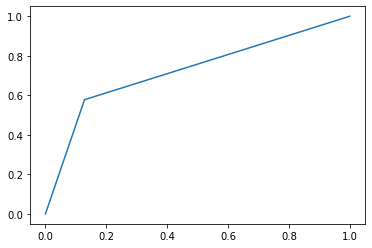

In [74]:
sns.lineplot(x=fpr, y=tpr)   # ROC curve

In [75]:
auc(fpr,tpr)   # area under the ROC curve

0.7246687054026503

In [76]:
new = [148,50,35,0,33.6,0.627,50]
new = np.array([new])
new

array([[148.   ,  50.   ,  35.   ,   0.   ,  33.6  ,   0.627,  50.   ]])

In [77]:
new_scaled = scalar.transform(new)
new_scaled

array([[ 0.86387994, -0.98561846,  0.90726993, -0.69289057,  0.20401277,
         0.46849198,  1.42602233]])

In [81]:
model.predict(new_scaled)

array([1], dtype=int64)

In [80]:
# frist value is probabilty is prob value of class zero, and second number is probab of class one
model.predict_proba(new_scaled)

array([[0.20363079, 0.79636921]])

# Probabilitiy

In [85]:
prob = model.predict_proba(X_test)
prob

array([[0.94702819, 0.05297181],
       [0.79700288, 0.20299712],
       [0.86599925, 0.13400075],
       [0.49334049, 0.50665951],
       [0.21415905, 0.78584095],
       [0.88079688, 0.11920312],
       [0.91961673, 0.08038327],
       [0.56687387, 0.43312613],
       [0.96281717, 0.03718283],
       [0.42666045, 0.57333955],
       [0.73938035, 0.26061965],
       [0.74788664, 0.25211336],
       [0.25662216, 0.74337784],
       [0.75169777, 0.24830223],
       [0.98029062, 0.01970938],
       [0.32898639, 0.67101361],
       [0.15357241, 0.84642759],
       [0.95730804, 0.04269196],
       [0.74077169, 0.25922831],
       [0.10974865, 0.89025135],
       [0.16126848, 0.83873152],
       [0.12325019, 0.87674981],
       [0.89421124, 0.10578876],
       [0.45948495, 0.54051505],
       [0.91867661, 0.08132339],
       [0.95909044, 0.04090956],
       [0.34766576, 0.65233424],
       [0.58860632, 0.41139368],
       [0.71112284, 0.28887716],
       [0.75028274, 0.24971726],
       [0.

In [88]:
prob_1 = prob[:,1]
prob_1

array([0.05297181, 0.20299712, 0.13400075, 0.50665951, 0.78584095,
       0.11920312, 0.08038327, 0.43312613, 0.03718283, 0.57333955,
       0.26061965, 0.25211336, 0.74337784, 0.24830223, 0.01970938,
       0.67101361, 0.84642759, 0.04269196, 0.25922831, 0.89025135,
       0.83873152, 0.87674981, 0.10578876, 0.54051505, 0.08132339,
       0.04090956, 0.65233424, 0.41139368, 0.28887716, 0.24971726,
       0.42280322, 0.3466205 , 0.00875264, 0.18308709, 0.18542933,
       0.94348591, 0.42459645, 0.58078188, 0.31754185, 0.0540969 ,
       0.18009119, 0.12467618, 0.28002344, 0.2065545 , 0.03836182,
       0.04905144, 0.24376492, 0.31538505, 0.15232401, 0.41002981,
       0.99438858, 0.33234332, 0.51552252, 0.66218826, 0.33631183,
       0.38438902, 0.93031224, 0.41653918, 0.59690608, 0.05414763,
       0.3197217 , 0.73995127, 0.82865872, 0.83538674, 0.35384096,
       0.15817767, 0.80713564, 0.19714759, 0.26217761, 0.27368166,
       0.11064528, 0.10775927, 0.4684437 , 0.12284039, 0.08951

In [117]:
thresh = 0.49
l1 = []
for value in prob_1:
    if value>thresh:
        l1.append(1)
    else:
        l1.append(0)

In [118]:
print(classification_report(y_test,l1))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.66      0.60      0.63        45

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.79      0.79      0.79       154

